In [335]:
import pandas as pd
import numpy as np
import patsy
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import naive_bayes


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import svm

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [336]:
df = pd.read_pickle('./data/mushrooms_alldummies.pkl')

df = df.drop(['cap-shape_bell',
              'cap-shape_conical',
              'cap-shape_flat',
              'cap-shape_knobbed',
              'cap-shape_sunken',
              'cap-shape_convex'], axis=1)

df['cap-color_yellow'] = df['cap-color_yellow'] + df['cap-color_buff']
df['cap-color_brown'] = df['cap-color_brown'] + df['cap-color_cinnamon']
df = df.drop(['cap-color_buff','cap-color_cinnamon'], axis=1)

df = df.drop(['bruises_no'],axis=1)

df = df.drop(['odor_foul','odor_pungent','odor_fishy','odor_spicy','odor_musty','odor_creosote','odor_anise'],axis=1)

df = df.drop(['gill-attachment_free'], axis=1)
df = df.drop(['gill-spacing_close'], axis=1)

df = df.drop(['gill-size_broad','gill-size_narrow'], axis=1)

df['gill-color_yellow'] = df['gill-color_yellow'] + df['gill-color_buff']
df['gill-color_brown'] = df['gill-color_brown'] + df['gill-color_chocolate']
df = df.drop(['gill-color_buff','gill-color_chocolate'], axis=1)

df = df.drop(['stalk-shape_enlarging','stalk-shape_tapering'],axis=1)
df = df.drop(['stalk-root_missing','stalk-root_bulbous','stalk-root_club','stalk-root_equal','stalk-root_rooted'],axis=1)

df['stalk-color-above-ring_brown'] = df['stalk-color-above-ring_brown'] + df['stalk-color-above-ring_cinnamon']
df['stalk-color-above-ring_yellow'] = df['stalk-color-above-ring_yellow'] + df['stalk-color-above-ring_buff']
df = df.drop(['stalk-color-above-ring_cinnamon','stalk-color-above-ring_buff'], axis=1)

df['stalk-color-below-ring_brown'] = df['stalk-color-below-ring_brown'] + df['stalk-color-below-ring_cinnamon']
df['stalk-color-below-ring_yellow'] = df['stalk-color-below-ring_yellow'] + df['stalk-color-below-ring_buff']
df = df.drop(['stalk-color-below-ring_cinnamon','stalk-color-below-ring_buff'], axis=1)

df = df.drop(['veil-type_partial','veil-color_brown','veil-color_orange','veil-color_white','veil-color_yellow'],axis=1)

df = df.drop(['ring-number_none'], axis=1)

df = df.drop(['ring-type_evanescent','ring-type_flaring','ring-type_large','ring-type_none','ring-type_pendant'],axis=1)

df['stalk-surface-below-ring_smooth'] = df['stalk-surface-below-ring_smooth'] + df['stalk-surface-below-ring_silky']
df['stalk-surface-above-ring_smooth'] = df['stalk-surface-above-ring_smooth'] + df['stalk-surface-above-ring_silky']
df = df.drop(['stalk-surface-below-ring_silky','stalk-surface-above-ring_silky'], axis=1)

df['spore-print-color_yellow'] = df['spore-print-color_yellow'] + df['spore-print-color_buff']
df['spore-print-color_brown'] = df['spore-print-color_brown'] + df['spore-print-color_chocolate']
df = df.drop(['spore-print-color_buff','spore-print-color_chocolate'],axis=1)

df = df.drop(['population_abundant','population_numerous','population_scattered','population_several'],axis=1)

df['habitat_grasses'] = df['habitat_grasses'] + df['habitat_meadows']
df = df.drop(['habitat_meadows','habitat_paths','habitat_urban','habitat_waste'],axis=1)

In [337]:
def model_scores(clf, xtrain, ytrain, xtest, ytest, threshold=0.5):
    clf.fit(xtrain,ytrain)
    # calculate and print scores for train
    y_true = ytrain
#     y_pred = clf.predict(Xtrain)
    y_prob = clf.predict_proba(xtrain)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    train_acc=accuracy_score(y_true, y_pred)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    # calculate and print scores for test
    test_acc=clf.score(xtest,ytest)
    y_true = ytest
    y_prob = clf.predict_proba(xtest)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    test_acc=accuracy_score(y_true, y_pred)
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    make_plots(clf,xtest,ytest,threshold)
    
def make_plots(clf,x,y,threshold=0.5):
#     fig, ax1 = plt.subplots(figsize=(6,6))

#     # These are in unitless percentages of the figure size. (0,0 is bottom left)
#     left, bottom, width, height = [0.5, 0.1, 0.4, 0.4]
#     ax2 = fig.add_axes([left, bottom, width, height])

#     plot_roc(clf,x,y,ax1)
#     plot_conf(clf,x,y,ax2,threshold)

#     plt.subplots(1,2)
    # plot ROC for both classes
#     ax = plt.subplot(1,2,1)

#     plt.figure(figsize=(4,4))
#     plot_roc(clf,x,y)
#     # plot confusion matrix
# #     ax = plt.subplot(1,2,2)
#     plt.figure(figsize=(4,4))
#     plot_conf(clf,x,y,threshold)

    plt.subplots(1,2,figsize=(8,4))
    plt.subplot(1,2,1)
    plot_roc(clf,x,y)
    # plot confusion matrix
    plt.subplot(1,2,2)
    plot_conf(clf,x,y,threshold)
    
def plot_roc(clf,x,y):

    # calculate ROC
    pos_label = 1 # roc-curve for poisonous mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'k',linewidth=3,alpha=0.5)
    pos_label = 0 # roc-curve for edible mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'r',linewidth=3,alpha=0.5)
    
    plt.plot([0,1],[0,1],'k:')
    plt.legend(['poisonous','edible'],fontsize=12)
    plt.xlabel('FPR',fontsize=12,fontweight='bold')
    plt.ylabel('TPR',fontsize=12,fontweight='bold')
    plt.axis('scaled')
    plt.tight_layout()

def plot_roc_simple(clf,x,y,pos_label=1):
    
    # calculate ROC
    y_score=clf.predict_proba(x)[:,pos_label]
    print('ROC_AUC score:',roc_auc_score(y, y_score, average='macro', sample_weight=None))

    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,linewidth=5, alpha=0.5)
    

    
def plot_conf(clf,x,y,threshold=0.5):
    
    y_true = y
    y_prob = clf.predict_proba(x)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
#     print(conf)
    
    # plot confusion matrix
    plt.imshow(conf, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.text(0,0,conf[0][0],fontsize=21,fontweight='bold',color='w',ha='center')
    plt.text(1,0,conf[0][1],fontsize=21,fontweight='bold',color='#CC0000',ha='center')
    plt.text(0,1,conf[1][0],fontsize=21,fontweight='bold',color='#88CC00',ha='center')
    plt.text(1,1,conf[1][1],fontsize=21,fontweight='bold',color='w',ha='center')
    ax = plt.gca()
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Poisonous\n(Predicted)','Edible\n(Predicted)'],fontsize=12)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Poisonous\n(True)','Edible\n(True)'],fontsize=12)
    plt.tight_layout()

In [338]:
data = df.iloc[:,:]
X = data.iloc[:,1:]
y = data.iloc[:,0]

# xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.3, random_state=432)
xtrain, _, ytrain, _ = train_test_split(X, y, stratify=y, test_size=0.5, random_state=432)

data.shape

(8124, 62)

In [359]:
np.random.seed(seed=333)
X_noise = X.iloc[:,:]
def add_noise(val):
    if np.random.random()>0.9999:
        return 1-val
    else:
        return val
X_noise = X_noise.applymap(add_noise)

# xtrain, xtest, ytrain, ytest = train_test_split(X_noise, y, stratify=y, test_size=0.3, random_state=432)
_, xtest, _, ytest = train_test_split(X_noise, y, stratify=y, test_size=0.5, random_state=432)

data.shape

(8124, 62)

In [360]:
threshold = 0.5

### Logistic Regression

Training Data Accuracy: 0.96
             precision    recall  f1-score   support

          0       1.00      0.92      0.96      2104
          1       0.92      1.00      0.96      1958

avg / total       0.96      0.96      0.96      4062

[[1955    3]
 [ 171 1933]]
Test Data Accuracy:     0.81
             precision    recall  f1-score   support

          0       0.90      0.72      0.80      2104
          1       0.75      0.91      0.83      1958

avg / total       0.83      0.81      0.81      4062

[[1790  168]
 [ 588 1516]]


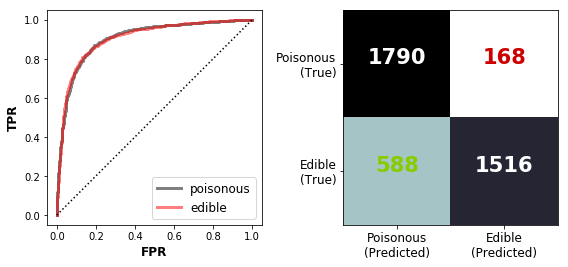

In [341]:
lr = LogisticRegression(class_weight='balanced')
model_scores(lr, xtrain, ytrain, xtest, ytest, threshold)

{'C': 1000.0}
Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      2104
          1       0.97      1.00      0.99      1958

avg / total       0.99      0.99      0.99      4062

[[1953    5]
 [  52 2052]]
Test Data Accuracy:     0.78
             precision    recall  f1-score   support

          0       0.80      0.76      0.78      2104
          1       0.75      0.80      0.77      1958

avg / total       0.78      0.78      0.78      4062

[[1557  401]
 [ 511 1593]]


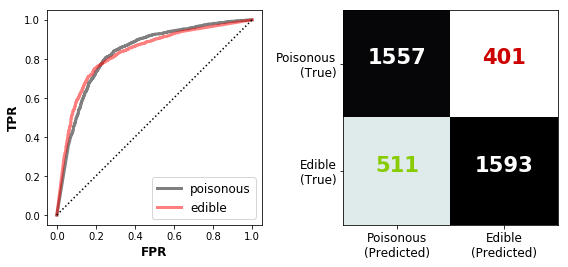

In [342]:
gs = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), 
                  param_grid={'C': np.logspace(-2,3,num=10)}, 
                  scoring='roc_auc',
                  n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
lr = gs.best_estimator_
model_scores(lr, xtrain, ytrain, xtest, ytest, threshold)

### Decision Tree

Training Data Accuracy: 0.95
             precision    recall  f1-score   support

          0       1.00      0.90      0.95      2104
          1       0.90      1.00      0.95      1958

avg / total       0.95      0.95      0.95      4062

[[1955    3]
 [ 208 1896]]
Test Data Accuracy:     0.95
             precision    recall  f1-score   support

          0       1.00      0.90      0.95      2104
          1       0.90      1.00      0.95      1958

avg / total       0.95      0.95      0.95      4062

[[1952    6]
 [ 208 1896]]


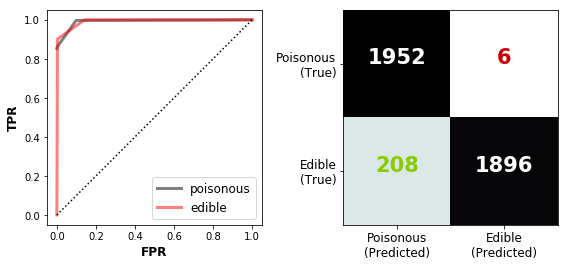

In [361]:
dt = DecisionTreeClassifier(max_depth=3,class_weight='balanced')
model_scores(dt, xtrain, ytrain, xtest, ytest, threshold)

{'max_depth': 9}
Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.97      0.99      2104
          1       0.97      1.00      0.98      1958

avg / total       0.99      0.99      0.99      4062

[[1954    4]
 [  56 2048]]
Test Data Accuracy:     0.98
             precision    recall  f1-score   support

          0       1.00      0.97      0.99      2104
          1       0.97      1.00      0.98      1958

avg / total       0.99      0.98      0.98      4062

[[1953    5]
 [  56 2048]]


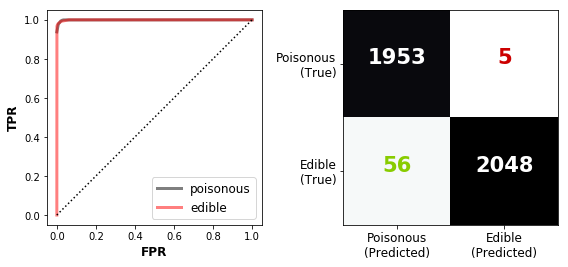

In [364]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'), 
                   param_grid={'max_depth': range(1,10)}, 
                   n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
dt = gs.best_estimator_
model_scores(dt, xtrain, ytrain, xtest, ytest, threshold)

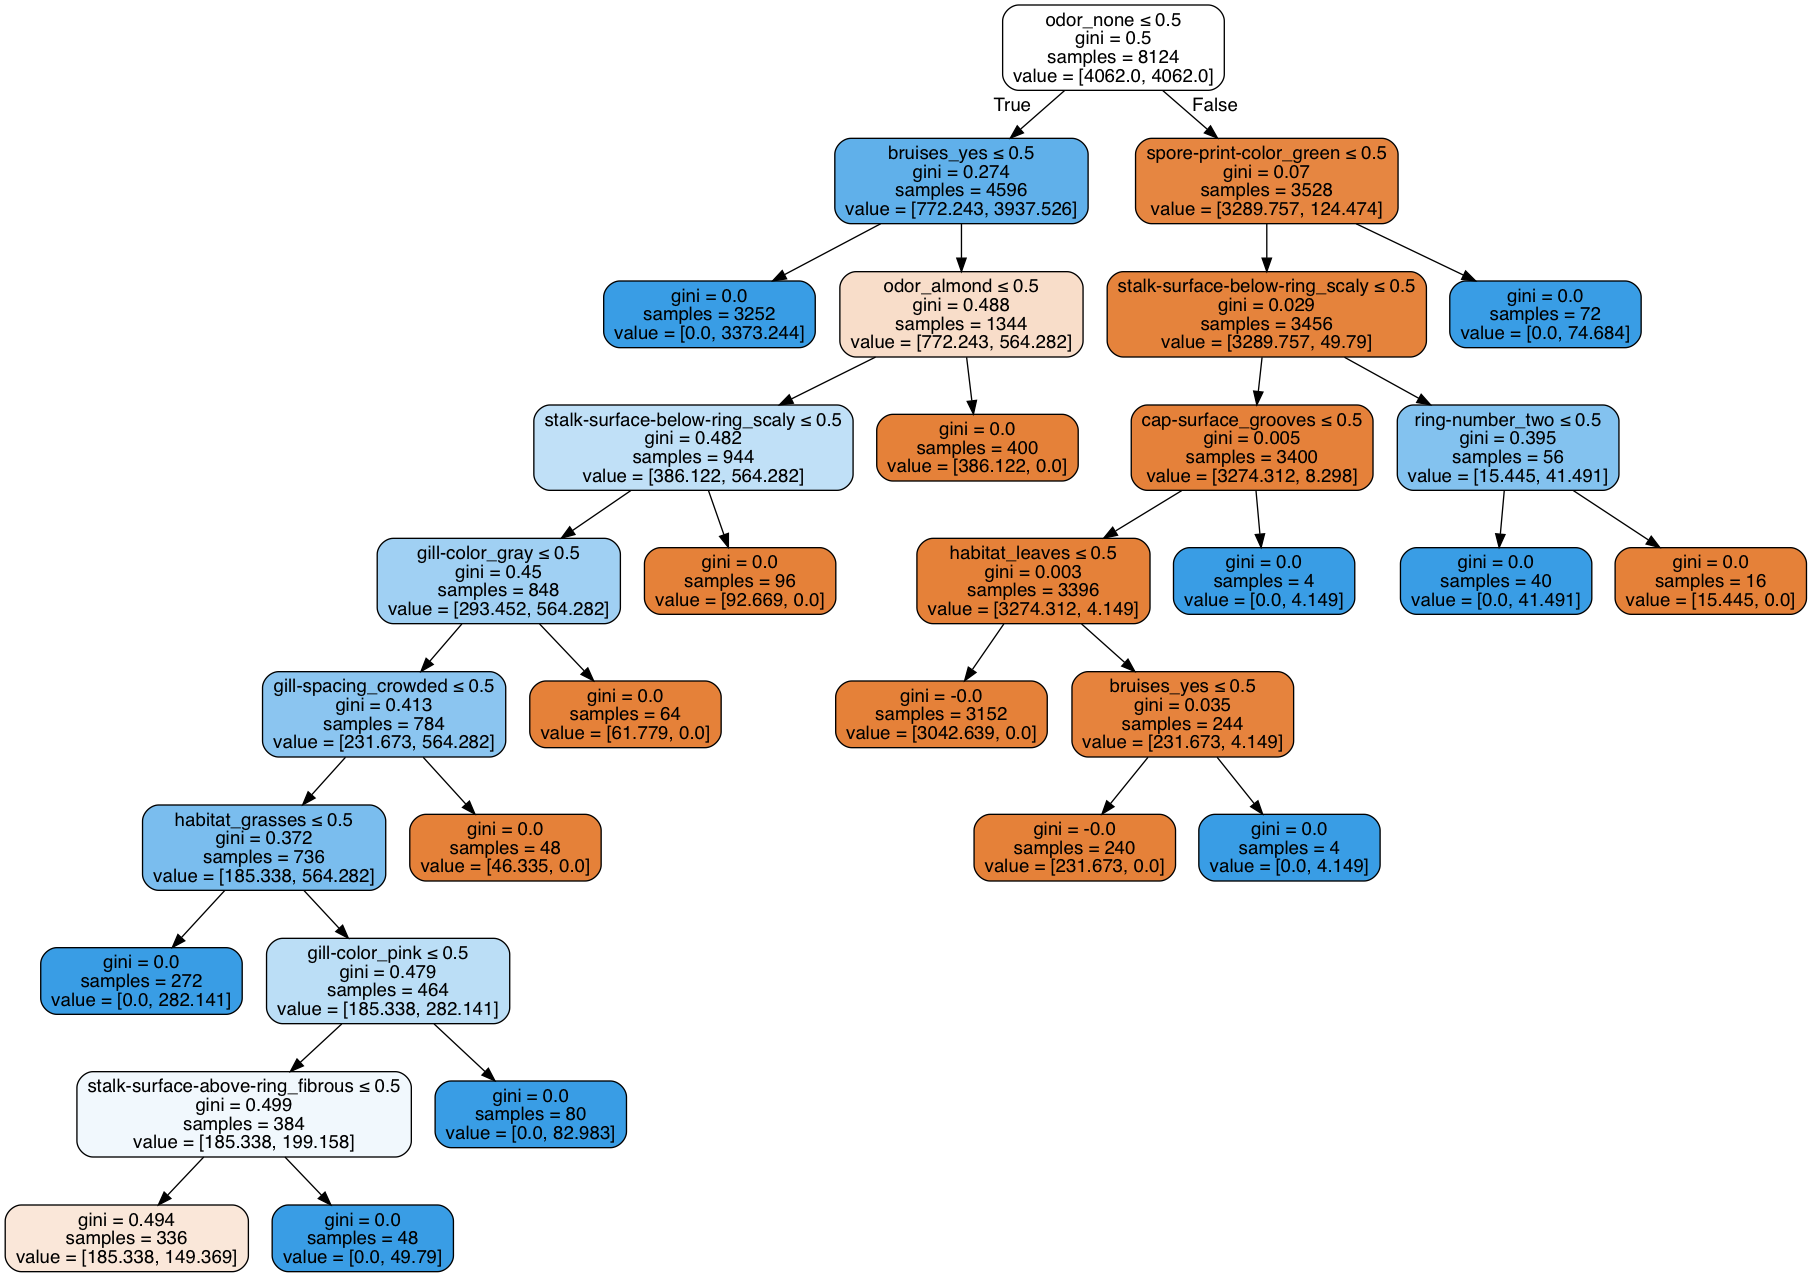

In [365]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

dot_data = StringIO()
# "dt" is the decision tree classifier
dt.fit(X,y)
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

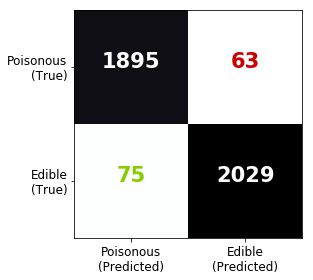

In [346]:
plot_conf(dt,xtrain,ytrain)

### Random Forest

Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.97      0.99      2104
          1       0.97      1.00      0.99      1958

avg / total       0.99      0.99      0.99      4062

[[1957    1]
 [  53 2051]]
Test Data Accuracy:     0.75
             precision    recall  f1-score   support

          0       0.99      0.52      0.68      2104
          1       0.66      1.00      0.79      1958

avg / total       0.83      0.75      0.73      4062

[[1949    9]
 [1014 1090]]


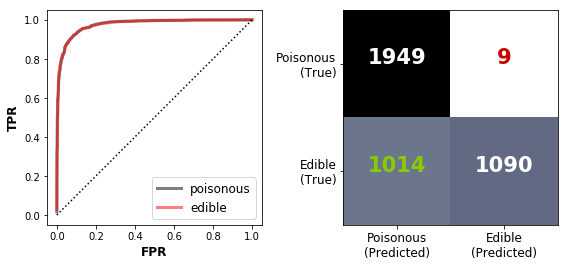

In [347]:
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
model_scores(rf, xtrain, ytrain, xtest, ytest, threshold)

{'n_estimators': 500}
Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.97      0.99      2104
          1       0.97      1.00      0.99      1958

avg / total       0.99      0.99      0.99      4062

[[1957    1]
 [  53 2051]]
Test Data Accuracy:     0.70
             precision    recall  f1-score   support

          0       0.99      0.43      0.60      2104
          1       0.62      1.00      0.76      1958

avg / total       0.81      0.70      0.68      4062

[[1952    6]
 [1203  901]]


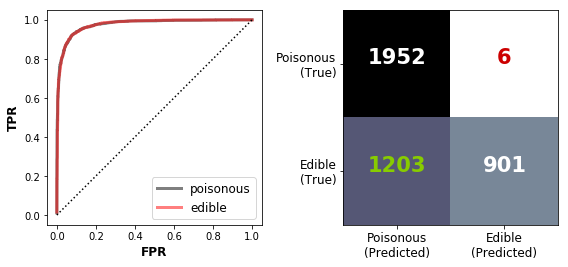

In [348]:
gs = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   scoring='roc_auc',
                   param_grid={'n_estimators': [10,20,50,100,250,500]}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
rf = gs.best_estimator_
model_scores(rf, xtrain, ytrain, xtest, ytest, threshold)

### Naive Bayes

Training Data Accuracy: 0.91
             precision    recall  f1-score   support

          0       0.87      0.97      0.92      2104
          1       0.96      0.85      0.90      1958

avg / total       0.92      0.91      0.91      4062

[[1661  297]
 [  61 2043]]
Test Data Accuracy:     0.81
             precision    recall  f1-score   support

          0       0.75      0.94      0.84      2104
          1       0.92      0.67      0.77      1958

avg / total       0.83      0.81      0.81      4062

[[1306  652]
 [ 118 1986]]


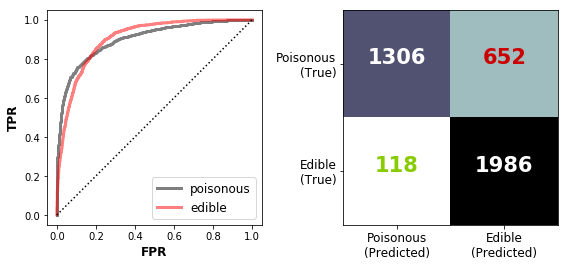

In [349]:
nb = naive_bayes.BernoulliNB()
model_scores(nb, xtrain, ytrain, xtest, ytest, threshold)

### SVM

Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2104
          1       0.98      0.99      0.99      1958

avg / total       0.99      0.99      0.99      4062

[[1943   15]
 [  36 2068]]
Test Data Accuracy:     0.89
             precision    recall  f1-score   support

          0       0.91      0.87      0.89      2104
          1       0.87      0.91      0.89      1958

avg / total       0.89      0.89      0.89      4062

[[1779  179]
 [ 274 1830]]


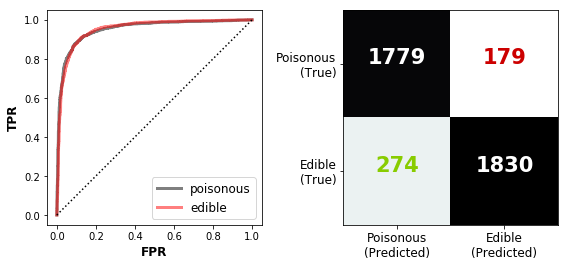

In [350]:
sv = svm.SVC(kernel='rbf', gamma = 0.1, probability=True,class_weight='balanced')
model_scores(sv, xtrain, ytrain, xtest, ytest, threshold)

{'gamma': 0.2}
Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2104
          1       0.99      0.99      0.99      1958

avg / total       0.99      0.99      0.99      4062

[[1932   26]
 [  16 2088]]
Test Data Accuracy:     0.82
             precision    recall  f1-score   support

          0       0.98      0.66      0.79      2104
          1       0.73      0.98      0.84      1958

avg / total       0.86      0.82      0.81      4062

[[1927   31]
 [ 705 1399]]


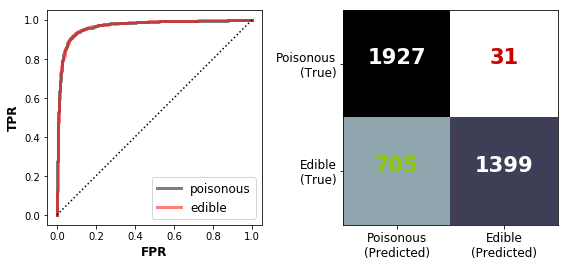

In [351]:
gs = GridSearchCV(estimator=svm.SVC(kernel='rbf', probability=True),
                   scoring='roc_auc',
                   param_grid={'gamma': [0.1,0.2,0.5]}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
sv = gs.best_estimator_
model_scores(sv, xtrain, ytrain, xtest, ytest, threshold)

### Plot ensemble ROC curve

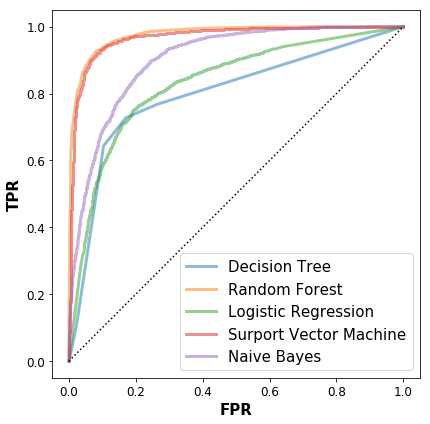

In [352]:
# clfs = {'Decision Tree': dt, 
#         'Random Forest': rf, 
#         'Logistic Regression': lr,
#         'Surport Vector Machine': sv, 
#         'Naive Bayes': nb,
#         'Ensembled': eclf}

def plot_roc_simple(clf,x,y,pos_label=0):
    
    # calculate ROC
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,linewidth=3, alpha=0.5)

clfs = {'Decision Tree': dt, 
        'Random Forest': rf, 
        'Logistic Regression': lr,
        'Surport Vector Machine': sv, 
        'Naive Bayes': nb}

plt.subplots(figsize=[6,6])
for clf in clfs.keys():
    plot_roc_simple(clfs[clf],xtest,ytest)
plt.legend(clfs.keys(),fontsize=15)
plt.plot([0,1],[0,1],'k:')
plt.xlabel('FPR',fontsize=15,fontweight='bold')
plt.ylabel('TPR',fontsize=15,fontweight='bold')
plt.axis('scaled')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()


### Plot score comparison

In [353]:
scores = dict.fromkeys(clfs.keys())

for key in scores.keys():
    clf = clfs[key]
    y_true = ytest
    y_prob = clf.predict_proba(xtest)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    
    scores[key] = {}
    scores[key]['accuracy'] = accuracy_score(y_true,y_pred)
    scores[key]['precision'] = precision_score(y_true,y_pred,pos_label=1)
    scores[key]['recall'] = recall_score(y_true,y_pred,pos_label=1)
    scores[key]['F1'] = f1_score(y_true,y_pred,pos_label=1)
    scores[key]['AUC'] = roc_auc_score(y_true,y_prob)
#     acc_scores.append(accuracy_score(y_true,y_pred))
#     pre_scores_p.append(precision_score(y_true,y_pred,pos_label=1))
#     pre_scores_e.append(precision_score(y_true,y_pred,pos_label=0))
#     rec_scores_p.append(recall_score(y_true,y_pred,pos_label=1))
#     rec_scores_e.append(recall_score(y_true,y_pred,pos_label=0))
#     f1_scores_p.append(f1_score(y_true,y_pred,pos_label=1))
#     f1_scores_e.append(f1_score(y_true,y_pred,pos_label=0))

 

In [354]:
df_scores = pd.DataFrame(scores)
df_scores.head(10)

,Decision Tree,Logistic Regression,Naive Bayes,Random Forest,Surport Vector Machine
AUC,0.797884,0.832082,0.902550,0.975613,0.967399
F1,0.786643,0.773472,0.772324,0.763544,0.839651
accuracy,0.765633,0.775480,0.810438,0.702363,0.818808
precision,0.700879,0.752901,0.917135,0.618700,0.732143
recall,0.896323,0.795199,0.667007,0.996936,0.984168


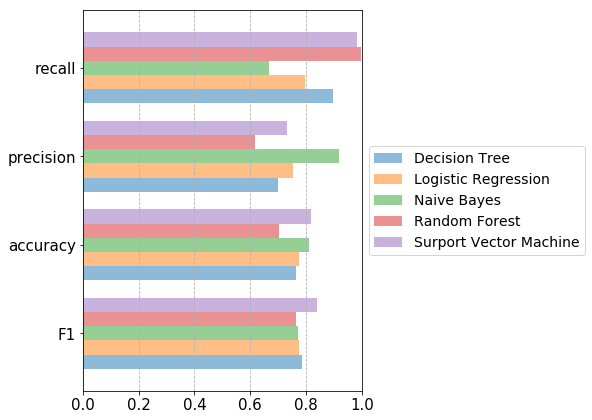

In [355]:
ax = df_scores.iloc[1:,:].plot.barh(figsize=(5,7),alpha=0.5,width=0.8)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=14)
# ax.set_yticklabels(['Accuracy','F1','F1','Precision','Recall','AUC'],fontsize=12);
plt.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([0,1])
ax.grid(True,axis='x',ls='--')


### decision tree to json

In [356]:
def tree2json(decision_tree, out_file=None, feature_names=None):
    
    import numpy as np
    from sklearn.tree import _tree

    def arr_to_py(arr):
        arr = arr.ravel()
        wrapper = float
        if np.issubdtype(arr.dtype, np.int):
            wrapper = int
        return map(wrapper, arr.tolist())


    def node_to_str(tree, node_id):
        if (tree.children_left[node_id] == tree.children_right[node_id]): # is leaf
            if tree.value[node_id].argmax()==0:
                node_repr = '"name": "Risk: low"'
            else:
                node_repr = '"name": "Risk: high"'
            print("Is a leaf",node_repr)
        else: # not leaf
            node_repr = '"name": "%s"' \
                    % (feature_names[tree.feature[node_id]])
            print("Not a leaf",node_repr)
        return node_repr

    def recurse(tree, node_id, parent=None):

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]
        print(node_id,left_child,right_child)

        # Open node with description
        out_file.write('{%s' % node_to_str(tree, node_id))

        # write children
        if left_child != right_child: # not leaf
            out_file.write(', "children": [')
            recurse(tree, left_child, node_id)
            out_file.write(', ')
            recurse(tree, right_child, node_id)
            out_file.write(']')

        # close node
        out_file.write('}')

    if out_file is None:
        out_file = open("tree.json", "w")
    else:
        out_file = open(out_file, "w")

    if isinstance(decision_tree, _tree.Tree):
        recurse(decision_tree, 0)
    else:
        print('getting tree structure')
        recurse(decision_tree.tree_, 0)

    return out_file

In [357]:
out_file = tree2json(dt, out_file='partial_tree',feature_names=X.columns)
out_file.close()

getting tree structure
0 1 8
Not a leaf "name": "odor_none"
1 2 3
Not a leaf "name": "bruises_yes"
2 -1 -1
Is a leaf "name": "Risk: high"
3 4 7
Not a leaf "name": "odor_almond"
4 5 6
Not a leaf "name": "cap-surface_smooth"
5 -1 -1
Is a leaf "name": "Risk: low"
6 -1 -1
Is a leaf "name": "Risk: high"
7 -1 -1
Is a leaf "name": "Risk: low"
8 9 16
Not a leaf "name": "spore-print-color_green"
9 10 13
Not a leaf "name": "stalk-surface-below-ring_scaly"
10 11 12
Not a leaf "name": "cap-surface_grooves"
11 -1 -1
Is a leaf "name": "Risk: low"
12 -1 -1
Is a leaf "name": "Risk: high"
13 14 15
Not a leaf "name": "population_solitary"
14 -1 -1
Is a leaf "name": "Risk: high"
15 -1 -1
Is a leaf "name": "Risk: low"
16 -1 -1
Is a leaf "name": "Risk: high"
